In [1]:
import pandas as pd
import seaborn as sns

In [2]:
ca_df = pd.read_csv("marketing_customer_analysis_clean.csv")

In [3]:
ca_df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [4]:
ca_df = ca_df.drop(columns = ["unnamed:_0", "customer", "effective_to_date"])

In [5]:
ca_df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [6]:
categoricals = ca_df.select_dtypes(include=object)
numericals = ca_df.select_dtypes(include = 'number')

In [7]:
ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size"])

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
enc = OrdinalEncoder(categories=[["Premium", "Extended", "Basic"]])

ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])

/var/folders/jj/y9r3z26d3g90cs_gnc5ptl640000gn/T/ipykernel_68369/2464240145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])


In [10]:
enc = OrdinalEncoder(categories=[["Doctor", "Master", "Bachelor", "College", "High School or Below"]])

ordinals["education"] = enc.fit_transform(ordinals[["education"]])

/var/folders/jj/y9r3z26d3g90cs_gnc5ptl640000gn/T/ipykernel_68369/392325911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["education"] = enc.fit_transform(ordinals[["education"]])


In [11]:
enc = OrdinalEncoder(categories=[["Large", "Medsize", "Small"]])

ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])

/var/folders/jj/y9r3z26d3g90cs_gnc5ptl640000gn/T/ipykernel_68369/2100830993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])


In [12]:
ordinals

,coverage,education,vehicle_size
0,2.0,3.0,1.0
1,2.0,3.0,1.0
2,2.0,2.0,1.0
3,1.0,3.0,1.0
4,0.0,2.0,1.0
...,...,...,...
10905,0.0,2.0,1.0
10906,2.0,3.0,1.0
10907,1.0,2.0,1.0
10908,0.0,3.0,1.0


In [13]:
nominals

,state,response,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_type
0,Arizona,No,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,A
1,California,No,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,A
2,Washington,No,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,A
3,Oregon,Yes,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,A
4,Oregon,No,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,A
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,A
10906,Oregon,No,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,A
10907,Arizona,No,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,A
10908,California,No,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,A


In [14]:
nominals = pd.get_dummies(nominals, dtype=int)

In [15]:
nominals

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [16]:
categorical = pd.concat([ordinals,nominals], axis=1)

In [17]:
categorical

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,2.0,3.0,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2.0,3.0,1.0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,2.0,2.0,1.0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
3,1.0,3.0,1.0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,0.0,2.0,1.0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,2.0,1.0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
10906,2.0,3.0,1.0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1.0,2.0,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0.0,3.0,1.0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [18]:
final_df = pd.concat([numericals,ordinals,nominals], axis=1)

In [19]:
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,coverage,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,2.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,2.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,2.0,...,0,1,0,0,0,0,1,0,0,1
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,1.0,...,1,0,0,1,0,0,0,0,0,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,0.0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,0.0,...,0,0,1,0,1,0,0,0,0,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,2.0,...,1,0,0,1,0,0,0,0,0,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,1.0,...,0,0,1,0,0,1,0,0,0,1
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,0.0,...,1,0,0,0,0,0,1,0,0,1


In [20]:
###X-y split (y is the target variable, in this case, "total claim amount")

In [21]:
#cleaning data

In [22]:
final_df = final_df.dropna()

In [23]:
final_df = final_df.drop_duplicates()

In [24]:
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,coverage,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,2.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,2.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,2.0,...,0,1,0,0,0,0,1,0,0,1
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,1.0,...,1,0,0,1,0,0,0,0,0,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,0.0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,0.0,...,0,0,1,0,1,0,0,0,0,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,2.0,...,1,0,0,1,0,0,0,0,0,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,1.0,...,0,0,1,0,0,1,0,0,0,1
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,0.0,...,1,0,0,0,0,0,1,0,0,1


In [25]:
#X-y split

In [26]:
final_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'polic

In [27]:
X = final_df.drop("total_claim_amount", axis=1)

In [28]:
y = final_df[["total_claim_amount"]]

In [29]:
#train_test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [32]:
y_test

,total_claim_amount
3173,432.408100
10693,511.200000
7780,325.395532
8135,480.578584
3382,1452.213743
...,...
9202,379.029102
9022,17.375878
6860,355.200000
7863,553.503610


In [33]:
#Standardize the data (after the data split!).


array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>,
        <Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>,
        <Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'coverage'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'vehicle_size'}>,
        <Axes: title={'center': 'state_Arizona'}>,
        <Axes: title={'center': 'state_California'}>,
        <Axes: title={'center': 'state_Nevada'}>,
        <Axes: title={'center': 'state_Oregon'}>],
       [<Axes: title={'center': 'state_Washington'}>,
        <Axes: title={'center': 'response_No'}>,
        <Axes: title={'center': 'respo

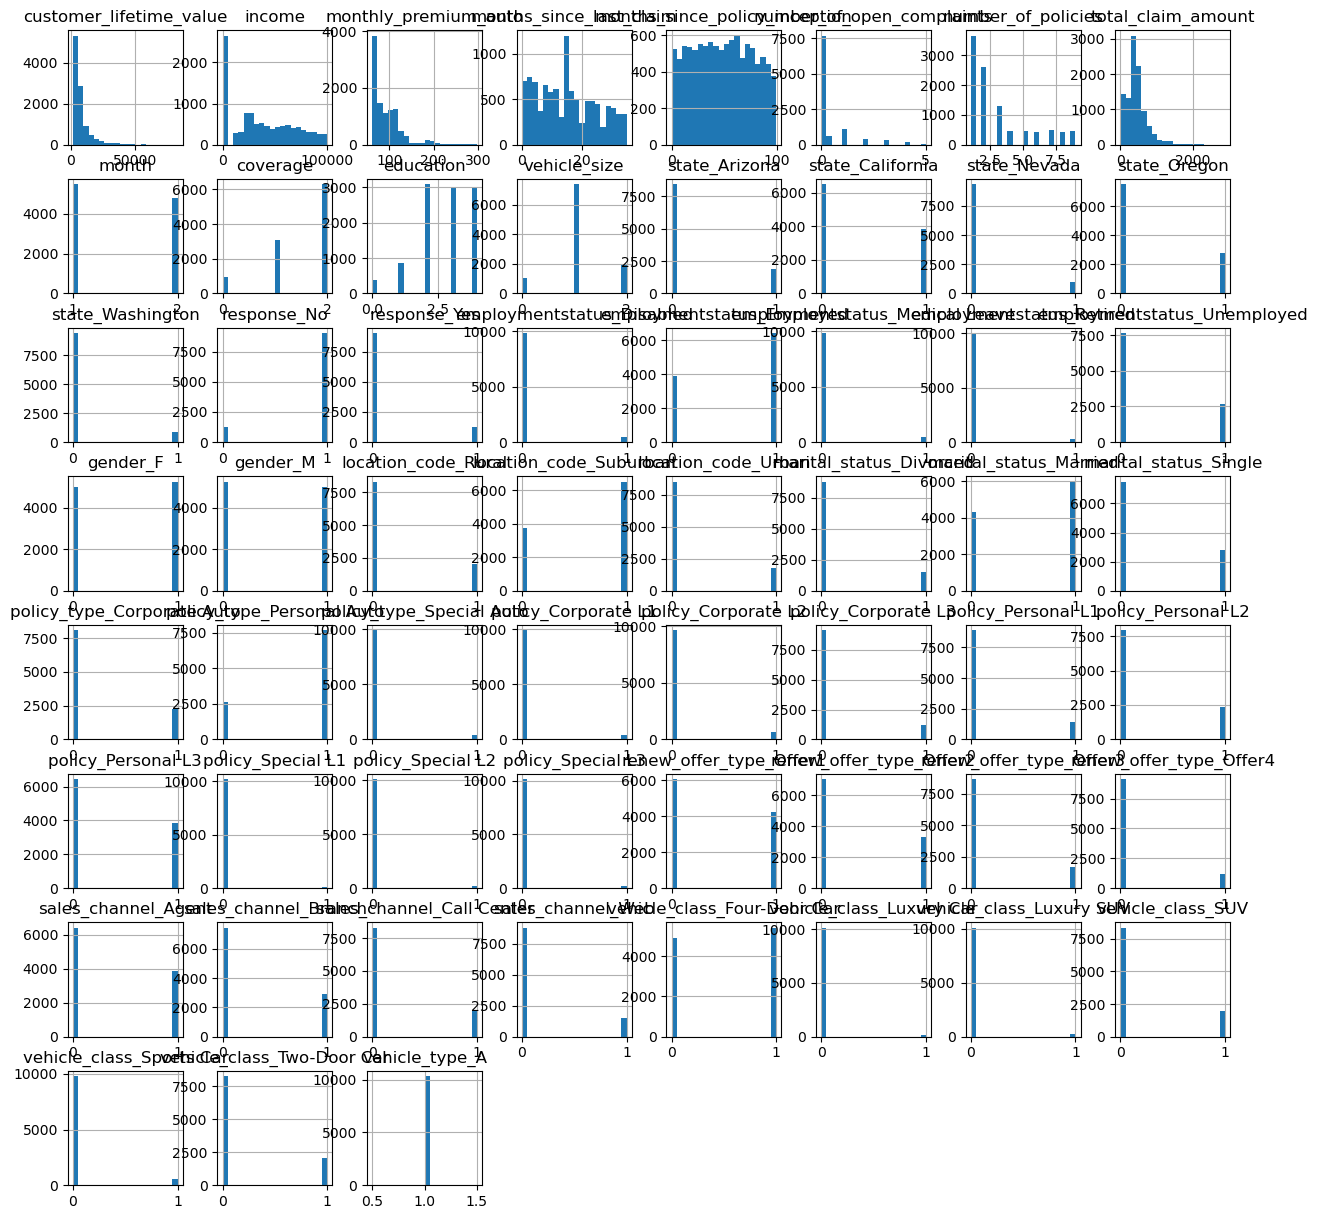

In [34]:
final_df.hist(bins=20, figsize=(15, 15))


In [35]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()



In [36]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
 

array([[<Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

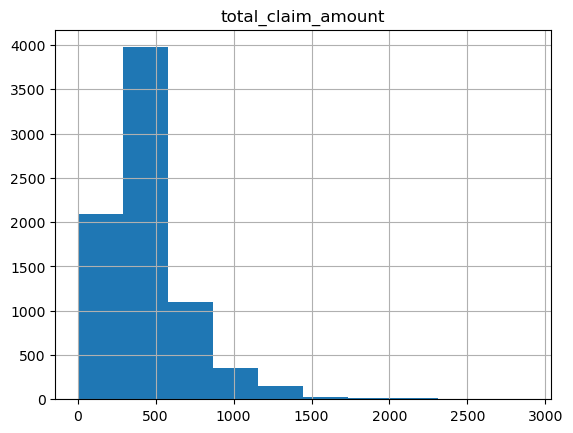

In [37]:
y_train.hist()

In [38]:
scaler.fit(y_train)

PowerTransformer()

In [39]:
y_train_scaled = scaler.transform(y_train)

In [40]:
y_test_scaled = scaler.transform(y_test)

In [41]:
#Model training

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)

In [44]:
model.coef_

array([[ 4.41118517e+00, -8.23082249e+00,  7.91079537e+01,
         5.17853072e+00, -1.70826212e+00, -3.40025896e+00,
        -1.11167242e+00,  4.21758772e-01, -2.48992789e+01,
         2.21556477e+00,  2.84499649e+00,  3.34207154e+14,
         4.19665647e+14,  2.52741818e+14,  3.89013920e+14,
         2.44638050e+14, -8.93903532e+14, -8.93903532e+14,
        -3.25793646e+14, -7.59132146e+14, -3.28440630e+14,
        -2.65680470e+14, -6.83479553e+14,  1.06089268e+15,
         1.06089268e+15,  1.08307303e+15,  1.30910944e+15,
         1.01863006e+15,  1.43552390e+13,  1.99731480e+13,
         1.80346527e+13, -2.21229006e+15, -1.02814696e+15,
        -1.10134885e+15,  1.30438740e+15,  1.67968419e+15,
         2.17731647e+15,  1.31171185e+15,  1.61139392e+15,
         1.84668415e+15,  6.07001832e+14,  9.30082990e+14,
         8.76245983e+14, -4.25579626e+14, -4.03235847e+14,
        -3.18998165e+14, -2.73325149e+14,  3.39097439e+15,
         3.12424835e+15,  2.75835585e+15,  2.48352593e+1

In [45]:
model.intercept_

array([435.15709931])

In [46]:
#create prediction for test set

In [47]:
y_pred = model.predict(X_test_scaled)

In [48]:
y_pred = pd.DataFrame(y_pred)

In [49]:
y_test = y_test.reset_index(drop=True)

In [50]:
resiudals_df = pd.concat([y_test,y_pred],axis=1)

In [51]:
residuals_df = resiudals_df.rename(columns={"total_claim_amount":"y_test", 0:"y_pred"})


In [52]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [53]:
residuals_df.head()

,y_test,y_pred,residual
0,432.408100,464.469599,-32.061499
1,511.200000,380.469599,130.730401
2,325.395532,227.500849,97.894683
3,480.578584,396.563349,84.015235
4,1452.213743,875.063349,577.150394


In [54]:
#Calculating metrics

In [55]:
mean_error = residuals_df["residual"].mean()

In [56]:
mean_error

2.865222980654765

In [57]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [58]:
mse(y_test,y_pred)

21273.955911789875

In [59]:
mae(y_test,y_pred)

99.6957608685794

In [60]:
rmse = mse(y_test,y_pred, squared = False)
rmse

145.85594232594664

In [61]:
from sklearn.metrics import r2_score

In [62]:
#Computing R2_score for test_set

In [63]:
r2_score(y_test, y_pred)

0.7628338290552413

In [64]:
round(r2_score(y_test, y_pred),2)

0.76

In [65]:
#Computing R2_score for train_set

In [66]:
y_pred_train = pd.DataFrame(model.predict(X_train_scaled))

In [67]:
r2_score(y_train,y_pred_train)

0.7328286469360783

In [68]:
feature_names = list(X_train.columns)

In [69]:
coefficients = model.coef_

In [70]:
coefficients = [i for i in coefficients[0]]

In [78]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,customer_lifetime_value,4.411185e+00
1,income,-8.230822e+00
2,monthly_premium_auto,7.910795e+01
3,months_since_last_claim,5.178531e+00
4,months_since_policy_inception,-1.708262e+00
5,number_of_open_complaints,-3.400259e+00
6,number_of_policies,-1.111672e+00
7,month,4.217588e-01
8,coverage,-2.489928e+01
9,education,2.215565e+00


<Axes: xlabel='coeff', ylabel='name'>

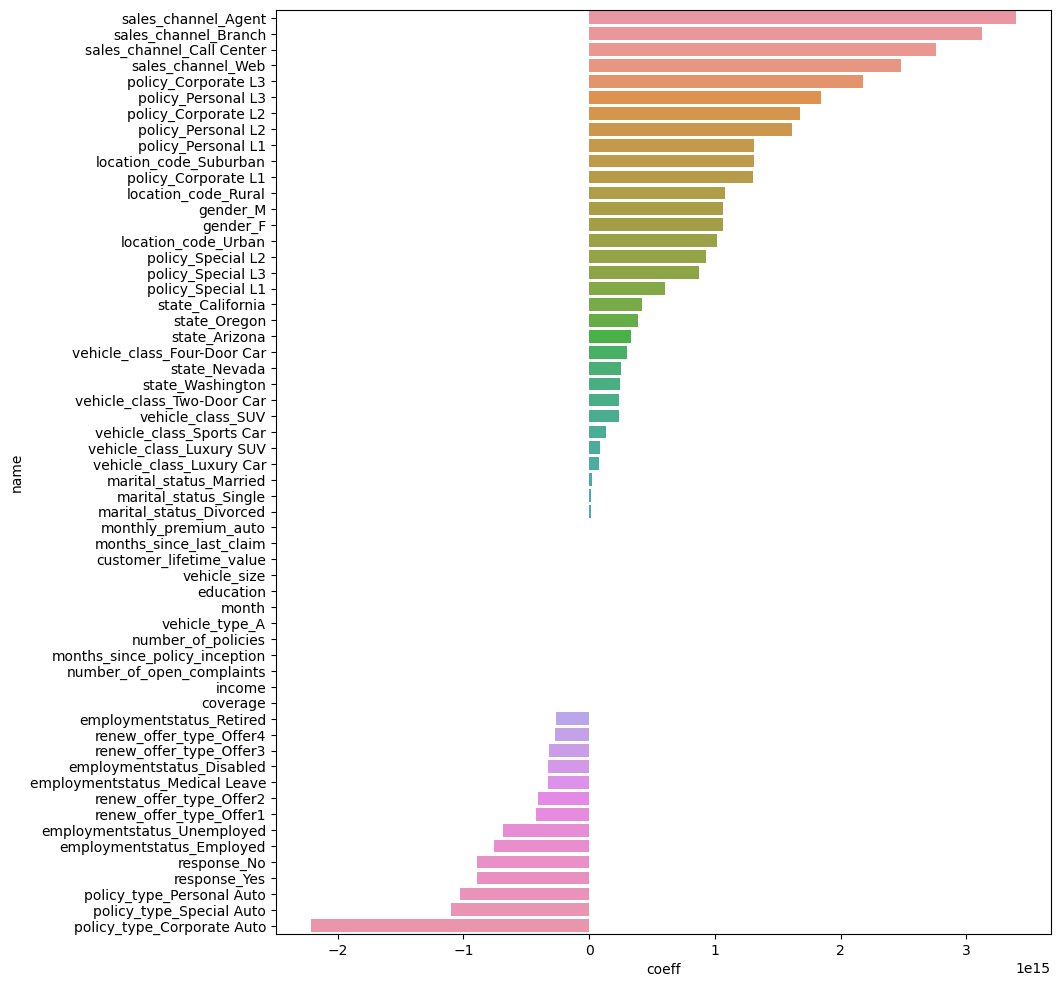

In [85]:
import matplotlib.pyplot as plt
fi_df = fi_df.sort_values(by='coeff', ascending=False)
plt.figure(figsize=(10,12))
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])

In [73]:
X_train["customer_lifetime_value"].describe()

count     7726.000000
mean      8087.218679
std       7004.271899
min       1898.007675
25%       4017.512846
50%       5780.599098
75%       9051.029983
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [74]:
#Encoding categorical variables